In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar

In [ ]:
from pandas.tseries.offsets import Day, BDay

# Load Dataset

In [ ]:
product = pd.read_csv(r"C:\Users\ADMIN\Downloads\processed_product.csv")
geography = pd.read_csv(r"C:\Users\ADMIN\Downloads\processed_geography(feature).csv")

In [ ]:
train = pd.read_csv(r"C:\Users\ADMIN\Downloads\train.csv")

In [ ]:
product.head()

,Category,Segment,Product,ProductID
0,Urban,Convenience,Maximus UC-01,536.0
1,Urban,Convenience,Maximus UC-02,537.0
2,Urban,Convenience,Maximus UC-03,538.0
3,Urban,Convenience,Maximus UC-04,539.0
4,Urban,Convenience,Maximus UC-05,540.0


In [ ]:
product['Category'].value_counts()

Category
Urban    1321
Rural     743
Mix       201
Youth     148
Name: count, dtype: int64

In [ ]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Category   2413 non-null   object 
 1   Segment    2413 non-null   object 
 2   Product    2413 non-null   object 
 3   ProductID  2412 non-null   float64
dtypes: float64(1), object(3)
memory usage: 75.6+ KB


In [ ]:
geography.head()

,Zip,City,State,Region,District,City_Name,State_Code,Region_Encoded,District_Encoded,Zip_Prefix
0,15201,"Pittsburgh, PA",PA,East,District #13,Pittsburgh,PA,1,12,152
1,15202,"Pittsburgh, PA",PA,East,District #13,Pittsburgh,PA,1,12,152
2,15203,"Pittsburgh, PA",PA,East,District #13,Pittsburgh,PA,1,12,152
3,15204,"Pittsburgh, PA",PA,East,District #13,Pittsburgh,PA,1,12,152
4,15205,"Pittsburgh, PA",PA,East,District #13,Pittsburgh,PA,1,12,152


In [ ]:
geography.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39948 entries, 0 to 39947
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Zip               39948 non-null  int64 
 1   City              39948 non-null  object
 2   State             39948 non-null  object
 3   Region            39948 non-null  object
 4   District          39948 non-null  object
 5   City_Name         39948 non-null  object
 6   State_Code        39948 non-null  object
 7   Region_Encoded    39948 non-null  int64 
 8   District_Encoded  39948 non-null  int64 
 9   Zip_Prefix        39948 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 3.0+ MB


In [ ]:
train.head()

,ProductID,Date,Zip,Units,Revenue,COGS
0,1228,2013-07-31,78773,12,19648.44,12309.747660
1,781,2014-03-12,90501,16,20351.52,13497.128064
2,2090,2013-11-29,44460,26,111367.62,91488.499830
3,1116,2018-08-29,30122,12,36280.44,21967.806420
4,993,2013-04-27,75789,14,55557.18,48645.866808


In [ ]:
train['ProductID'].value_counts()

ProductID
791     12296
792     12296
604     10362
2045    10076
487      9397
        ...  
1121        1
18          1
2328        1
1205        1
48          1
Name: count, Length: 1624, dtype: int64

# Feature engineering train dataset

## Domain Knowledge Features

In [ ]:
train['Date'] = pd.to_datetime(train['Date'])
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train.head()

,ProductID,Date,Zip,Units,Revenue,COGS,Year,Month
0,1228,2013-07-31,78773,12,19648.44,12309.747660,2013,7
1,781,2014-03-12,90501,16,20351.52,13497.128064,2014,3
2,2090,2013-11-29,44460,26,111367.62,91488.499830,2013,11
3,1116,2018-08-29,30122,12,36280.44,21967.806420,2018,8
4,993,2013-04-27,75789,14,55557.18,48645.866808,2013,4


In [ ]:
# holidays features
std = pd.to_datetime("2010-01-01")
edt = pd.to_datetime("2020-12-31")
calender = USFederalHolidayCalendar()
holidays = []
check = calender.holidays(start = std, end = edt)
for i in train['Date']:
    if i in check:
        holidays.append(1)
    else:
        holidays.append(0)
train['Is_holiday'] = pd.DataFrame(holidays)


In [ ]:
train['Is_holiday'].value_counts()

Is_holiday
0    884903
1     16658
Name: count, dtype: int64

In [ ]:
# business day features
business_day_check = pd.date_range('2010-01-01', '2020-12-31', freq=BDay())
business_day = []
for i in train['Date']:
    if i in business_day_check:
        business_day.append(1)
    else:
        business_day.append(0)
train['Is_business'] = pd.DataFrame(business_day)

In [ ]:
train['Is_business'].value_counts()

Is_business
1    580794
0    320767
Name: count, dtype: int64

In [ ]:
# Season feature
spring = []
summer = []
autumn = []
winter = []
for i in train['Month']:
    if (i == 12 or 1 <= i <= 4):
        winter.append(1)
        spring.append(0)
        summer.append(0)
        autumn.append(0)
    elif (4 <= i <= 5):
        winter.append(0)
        spring.append(1)
        summer.append(0)
        autumn.append(0)
    elif (6 <= i <= 9):
        winter.append(0)
        spring.append(0)
        summer.append(1)
        autumn.append(0)
    else:
        winter.append(0)
        spring.append(0)
        summer.append(0)
        autumn.append(1)
train['Is_spring'] = pd.DataFrame(spring)
train['Is_winter'] = pd.DataFrame(winter)
train['Is_autumn'] = pd.DataFrame(autumn)
train['Is_summer'] = pd.DataFrame(summer)

In [ ]:
# Quarter features
quarter1 = []
quarter2 = []
quarter3 = []
quarter4 = []
for i in train['Month']:
    if (1 <= i <= 3):
        quarter1.append(1)
        quarter2.append(0)
        quarter3.append(0)
        quarter4.append(0)
    elif (4 <= i <= 6):
        quarter1.append(0)
        quarter2.append(1)
        quarter3.append(0)
        quarter4.append(0)
    elif (7 <= i <= 9):
        quarter1.append(0)
        quarter2.append(0)
        quarter3.append(1)
        quarter4.append(0)
    else:
        quarter1.append(0)
        quarter2.append(0)
        quarter3.append(0)
        quarter4.append(1)
train['Quarter1'] = pd.DataFrame(quarter1)
train['Quarter2'] = pd.DataFrame(quarter2)
train['Quarter3'] = pd.DataFrame(quarter3)
train['Quarter4'] = pd.DataFrame(quarter4)

In [ ]:
# Week of year features
train['Week_of_Year'] = train['Date'].dt.isocalendar().week

In [ ]:
# Day of year features
train['Day_of_Year'] = train['Date'].dt.dayofyear

In [ ]:
# Cost per Unit
train['Cost_per_unit'] = train['COGS'] / train['Units']

In [ ]:
train.columns

Index(['ProductID', 'Date', 'Zip', 'Units', 'Revenue', 'COGS', 'Year', 'Month',
       'Is_holiday', 'Is_business', 'Is_spring', 'Is_winter', 'Is_autumn',
       'Is_summer', 'Quarter1', 'Quarter2', 'Quarter3', 'Quarter4',
       'Week_of_Year', 'Day_of_Year', 'Cost_per_unit'],
      dtype='object')

In [ ]:
salefact_aggregation = {
    'Revenue': ['sum'],
    'COGS': ['sum', 'mean', 'max', 'min', 'std'],
    'Cost_per_unit': ['sum', 'mean', 'std', 'max', 'min'],
    'Zip': [lambda x: x.mode().iloc[0] if not x.mode().empty else None, 'size'],
    'ProductID': [lambda x: x.mode().iloc[0] if not x.mode().empty else None],
    'Units': ['sum', 'mean', 'max', 'min', 'std']
    }

salefact_agg = train.groupby(['Date','Year', 'Month',
       'Is_holiday', 'Is_business', 'Is_spring', 'Is_winter', 'Is_autumn',
       'Is_summer', 'Quarter1', 'Quarter2', 'Quarter3', 'Quarter4',
       'Week_of_Year', 'Day_of_Year']).agg(salefact_aggregation).reset_index()
salefact_agg.columns = pd.Index(['SaleFact_' + e[0] + "_" + e[1].upper() for e in salefact_agg.columns.tolist()])


In [ ]:
salefact_agg.head()

,SaleFact_Date_,SaleFact_Year_,SaleFact_Month_,SaleFact_Is_holiday_,SaleFact_Is_business_,SaleFact_Is_spring_,SaleFact_Is_winter_,SaleFact_Is_autumn_,SaleFact_Is_summer_,SaleFact_Quarter1_,...,SaleFact_Cost_per_unit_MAX,SaleFact_Cost_per_unit_MIN,SaleFact_Zip_<LAMBDA_0>,SaleFact_Zip_SIZE,SaleFact_ProductID_<LAMBDA>,SaleFact_Units_SUM,SaleFact_Units_MEAN,SaleFact_Units_MAX,SaleFact_Units_MIN,SaleFact_Units_STD
0,2010-07-04,2010,7,0,0,0,0,0,1,0,...,10973.754540,492.303987,2886,217,396,252,1.161290,31,1,2.040510
1,2010-07-05,2010,7,1,1,0,0,0,1,0,...,13850.877285,622.741266,15236,204,396,208,1.019608,2,1,0.138989
2,2010-07-06,2010,7,0,1,0,0,0,1,0,...,10973.754540,3351.932955,16002,29,475,33,1.137931,4,1,0.580895
3,2010-07-07,2010,7,0,1,0,0,0,1,0,...,11754.390942,436.608522,6277,181,604,181,1.000000,1,1,0.000000
4,2010-07-08,2010,7,0,1,0,0,0,1,0,...,11754.390942,436.608522,15668,121,604,121,1.000000,1,1,0.000000


In [ ]:
# Lag Features
salefact_agg.sort_values('SaleFact_Date_', inplace=True)

salefact_agg['Units_Lag_1'] = salefact_agg['SaleFact_Units_SUM'].shift(1)
salefact_agg['Units_Lag_7'] = salefact_agg['SaleFact_Units_SUM'].shift(7)
salefact_agg['Units_Lag_30'] = salefact_agg['SaleFact_Units_SUM'].shift(30)

salefact_agg['COGS_Lag_1'] = salefact_agg['SaleFact_COGS_SUM'].shift(1)
salefact_agg['COGS_Lag_7'] = salefact_agg['SaleFact_COGS_SUM'].shift(7)
salefact_agg['COGS_Lag_30'] = salefact_agg['SaleFact_COGS_SUM'].shift(30)

salefact_agg['SaleFact_Cost_per_unit_SUM_Lag_1'] = salefact_agg['SaleFact_Cost_per_unit_SUM'].shift(1)
salefact_agg['SaleFact_Cost_per_unit_SUM_Lag_7'] = salefact_agg['SaleFact_Cost_per_unit_SUM'].shift(7)
salefact_agg['SaleFact_Cost_per_unit_SUM_Lag_30'] = salefact_agg['SaleFact_Cost_per_unit_SUM'].shift(30)


In [ ]:
# Rolling Statistics
salefact_agg['Units_Rolling_Mean_7'] = salefact_agg['SaleFact_Units_SUM'].rolling(window=7).mean()
salefact_agg['Units_Rolling_Std_7'] = salefact_agg['SaleFact_Units_SUM'].rolling(window=7).std()
salefact_agg['Units_Rolling_Mean_30'] = salefact_agg['SaleFact_Units_SUM'].rolling(window=30).mean()
salefact_agg['Units_Rolling_Std_30'] = salefact_agg['SaleFact_Units_SUM'].rolling(window=30).std()

In [ ]:
salefact_agg.head()

,SaleFact_Date_,SaleFact_Year_,SaleFact_Month_,SaleFact_Is_holiday_,SaleFact_Is_business_,SaleFact_Is_spring_,SaleFact_Is_winter_,SaleFact_Is_autumn_,SaleFact_Is_summer_,SaleFact_Quarter1_,...,COGS_Lag_1,COGS_Lag_7,COGS_Lag_30,SaleFact_Cost_per_unit_SUM_Lag_1,SaleFact_Cost_per_unit_SUM_Lag_7,SaleFact_Cost_per_unit_SUM_Lag_30,Units_Rolling_Mean_7,Units_Rolling_Std_7,Units_Rolling_Mean_30,Units_Rolling_Std_30
0,2010-07-04,2010,7,0,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-07-05,2010,7,1,1,0,0,0,1,0,...,1.340364e+06,NaN,NaN,1.112633e+06,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-07-06,2010,7,0,1,0,0,0,1,0,...,1.112580e+06,NaN,NaN,1.095992e+06,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-07-07,2010,7,0,1,0,0,0,1,0,...,2.373014e+05,NaN,NaN,2.061533e+05,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-07-08,2010,7,0,1,0,0,0,1,0,...,8.425688e+05,NaN,NaN,8.425688e+05,NaN,NaN,NaN,NaN,NaN,NaN


## Polynomial Features

In [ ]:
# Create polynomial features using the features that are highly correlated with target and all the features are time-related data
# use polynomials with degree of 3
# Make a new dataframe for polynomial features
poly_features = salefact_agg[['SaleFact_Year_', 'SaleFact_Month_', 'SaleFact_Is_spring_', 'SaleFact_Is_winter_', 'SaleFact_Quarter1_', 'SaleFact_Quarter2_', 'SaleFact_Quarter3_', 'SaleFact_Quarter4_']]

# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [ ]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (3718, 165)


In [ ]:
# Create a dataframe of the features
poly_features = pd.DataFrame(poly_features, columns = poly_transformer.get_feature_names_out(['SaleFact_Year_', 'SaleFact_Month_', 'SaleFact_Is_spring_', 'SaleFact_Is_winter_', 'SaleFact_Quarter1_', 'SaleFact_Quarter2_', 'SaleFact_Quarter3_', 'SaleFact_Quarter4_']))

# Merge polynomial features into training dataframe
poly_features['SaleFact_Date_'] = salefact_agg['SaleFact_Date_']
salefact_agg = salefact_agg.merge(poly_features, on = 'SaleFact_Date_', how = 'left')

# Print out the new shapes
print('Training data with polynomial features shape: ', salefact_agg.shape)

Training data with polynomial features shape:  (3718, 212)


In [ ]:
salefact_agg.head()

,SaleFact_Date_,SaleFact_Year__x,SaleFact_Month__x,SaleFact_Is_holiday_,SaleFact_Is_business_,SaleFact_Is_spring__x,SaleFact_Is_winter__x,SaleFact_Is_autumn_,SaleFact_Is_summer_,SaleFact_Quarter1__x,...,SaleFact_Quarter2_^3,SaleFact_Quarter2_^2 SaleFact_Quarter3_,SaleFact_Quarter2_^2 SaleFact_Quarter4_,SaleFact_Quarter2_ SaleFact_Quarter3_^2,SaleFact_Quarter2_ SaleFact_Quarter3_ SaleFact_Quarter4_,SaleFact_Quarter2_ SaleFact_Quarter4_^2,SaleFact_Quarter3_^3,SaleFact_Quarter3_^2 SaleFact_Quarter4_,SaleFact_Quarter3_ SaleFact_Quarter4_^2,SaleFact_Quarter4_^3
0,2010-07-04,2010,7,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2010-07-05,2010,7,1,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2010-07-06,2010,7,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2010-07-07,2010,7,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2010-07-08,2010,7,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Merge dataset

In [ ]:
final_train = salefact_agg.copy()
final_train.rename(columns= {'SaleFact_Zip_<LAMBDA_0>': 'Zip', 'SaleFact_ProductID_<LAMBDA>': 'ProductID'}, inplace = True)
final_train = final_train.merge(geography[['Zip', 'Region_Encoded', 'District_Encoded', 'Zip_Prefix']], on = 'Zip', how = 'left')
final_train = final_train.merge(product[['ProductID', 'Category', 'Segment']], on = 'ProductID', how = 'left')
final_train.head()

,SaleFact_Date_,SaleFact_Year__x,SaleFact_Month__x,SaleFact_Is_holiday_,SaleFact_Is_business_,SaleFact_Is_spring__x,SaleFact_Is_winter__x,SaleFact_Is_autumn_,SaleFact_Is_summer_,SaleFact_Quarter1__x,...,SaleFact_Quarter2_ SaleFact_Quarter4_^2,SaleFact_Quarter3_^3,SaleFact_Quarter3_^2 SaleFact_Quarter4_,SaleFact_Quarter3_ SaleFact_Quarter4_^2,SaleFact_Quarter4_^3,Region_Encoded,District_Encoded,Zip_Prefix,Category,Segment
0,2010-07-04,2010,7,0,0,0,0,0,1,0,...,0.0,1.0,0.0,0.0,0.0,1,1,288,Urban,Moderation
1,2010-07-05,2010,7,1,1,0,0,0,1,0,...,0.0,1.0,0.0,0.0,0.0,1,12,152,Urban,Moderation
2,2010-07-06,2010,7,0,1,0,0,0,1,0,...,0.0,1.0,0.0,0.0,0.0,1,12,160,Urban,Moderation
3,2010-07-07,2010,7,0,1,0,0,0,1,0,...,0.0,1.0,0.0,0.0,0.0,1,1,627,Urban,Convenience
4,2010-07-08,2010,7,0,1,0,0,0,1,0,...,0.0,1.0,0.0,0.0,0.0,1,12,156,Urban,Convenience


## Encode categorical features

In [ ]:
onehot = OneHotEncoder(sparse_output=False, handle_unknown="ignore")  # Set sparse=False to get a dense array

# For the training dataset
categorical_columns = [col for col in final_train.columns if final_train[col].dtype in ['object', 'category']]  # Identify categorical columns
encoded_columns = onehot.fit_transform(final_train[categorical_columns])  # Fit and transform only the categorical columns

# Replace the categorical columns with the one-hot encoded version
final_train_encoded = pd.concat([
    final_train.drop(columns=categorical_columns).reset_index(drop=True),  # Drop original categorical columns
    pd.DataFrame(encoded_columns, columns=onehot.get_feature_names_out(categorical_columns))  # Add encoded columns
], axis=1)

In [ ]:
final_train_encoded.head()

,SaleFact_Date_,SaleFact_Year__x,SaleFact_Month__x,SaleFact_Is_holiday_,SaleFact_Is_business_,SaleFact_Is_spring__x,SaleFact_Is_winter__x,SaleFact_Is_autumn_,SaleFact_Is_summer_,SaleFact_Quarter1__x,...,Category_Urban,Category_Youth,Segment_All Season,Segment_Convenience,Segment_Extreme,Segment_Moderation,Segment_Productivity,Segment_Regular,Segment_Select,Segment_Youth
0,2010-07-04,2010,7,0,0,0,0,0,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2010-07-05,2010,7,1,1,0,0,0,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2010-07-06,2010,7,0,1,0,0,0,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2010-07-07,2010,7,0,1,0,0,0,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010-07-08,2010,7,0,1,0,0,0,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature engineering test dataset

In [ ]:
test = pd.read_csv(r"C:\Users\ADMIN\Downloads\test.csv")

In [ ]:
test['Date'] = pd.to_datetime(test['Date'])
test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
std = pd.to_datetime("2021-01-01")
edt = pd.to_datetime("2022-12-31")
calender = USFederalHolidayCalendar()
holidays = []
check_test = calender.holidays(start = std, end = edt)
for i in test['Date']:
    if i in check_test:
        holidays.append(1)
    else:
        holidays.append(0)
test['Is_holiday'] = pd.DataFrame(holidays)

# business day features
business_day_check_test = pd.date_range('2021-01-01', '2022-12-31', freq=BDay())
business_day = []
for i in test['Date']:
    if i in business_day_check_test:
        business_day.append(1)
    else:
        business_day.append(0)
test['Is_business'] = pd.DataFrame(business_day)

# Season feature
spring = []
summer = []
autumn = []
winter = []
for i in test['Month']:
    if (i == 12 or 1 <= i <= 4):
        winter.append(1)
        spring.append(0)
        summer.append(0)
        autumn.append(0)
    elif (4 <= i <= 5):
        winter.append(0)
        spring.append(1)
        summer.append(0)
        autumn.append(0)
    elif (6 <= i <= 9):
        winter.append(0)
        spring.append(0)
        summer.append(1)
        autumn.append(0)
    else:
        winter.append(0)
        spring.append(0)
        summer.append(0)
        autumn.append(1)
test['Is_spring'] = pd.DataFrame(spring)
test['Is_winter'] = pd.DataFrame(winter)
test['Is_autumn'] = pd.DataFrame(autumn)
test['Is_summer'] = pd.DataFrame(summer)

# Quarter features
quarter1 = []
quarter2 = []
quarter3 = []
quarter4 = []
for i in test['Month']:
    if (1 <= i <= 3):
        quarter1.append(1)
        quarter2.append(0)
        quarter3.append(0)
        quarter4.append(0)
    elif (4 <= i <= 6):
        quarter1.append(0)
        quarter2.append(1)
        quarter3.append(0)
        quarter4.append(0)
    elif (7 <= i <= 9):
        quarter1.append(0)
        quarter2.append(0)
        quarter3.append(1)
        quarter4.append(0)
    else:
        quarter1.append(0)
        quarter2.append(0)
        quarter3.append(0)
        quarter4.append(1)
test['Quarter1'] = pd.DataFrame(quarter1)
test['Quarter2'] = pd.DataFrame(quarter2)
test['Quarter3'] = pd.DataFrame(quarter3)
test['Quarter4'] = pd.DataFrame(quarter4)

# Week of year features
test['Week_of_Year'] = test['Date'].dt.isocalendar().week

# Day of year features
test['Day_of_Year'] = test['Date'].dt.dayofyear

# Cost per Unit
test['Cost_per_unit'] = test['COGS'] / test['Units']


In [ ]:
test_agg = test.groupby(['Date','Year', 'Month',
       'Is_holiday', 'Is_business', 'Is_spring', 'Is_winter', 'Is_autumn',
       'Is_summer', 'Quarter1', 'Quarter2', 'Quarter3', 'Quarter4',
       'Week_of_Year', 'Day_of_Year']).agg(salefact_aggregation).reset_index()
test_agg.columns = pd.Index(['SaleFact_' + e[0] + "_" + e[1].upper() for e in test_agg.columns.tolist()])

# Lag Features
test_agg.sort_values('SaleFact_Date_', inplace=True)

test_agg['Units_Lag_1'] = test_agg['SaleFact_Units_SUM'].shift(1)
test_agg['Units_Lag_7'] = test_agg['SaleFact_Units_SUM'].shift(7)
test_agg['Units_Lag_30'] = test_agg['SaleFact_Units_SUM'].shift(30)

test_agg['COGS_Lag_1'] = test_agg['SaleFact_COGS_SUM'].shift(1)
test_agg['COGS_Lag_7'] = test_agg['SaleFact_COGS_SUM'].shift(7)
test_agg['COGS_Lag_30'] = test_agg['SaleFact_COGS_SUM'].shift(30)

test_agg['SaleFact_Cost_per_unit_SUM_Lag_1'] = test_agg['SaleFact_Cost_per_unit_SUM'].shift(1)
test_agg['SaleFact_Cost_per_unit_SUM_Lag_7'] = test_agg['SaleFact_Cost_per_unit_SUM'].shift(7)
test_agg['SaleFact_Cost_per_unit_SUM_Lag_30'] = test_agg['SaleFact_Cost_per_unit_SUM'].shift(30)

# Rolling Statistics
test_agg['Units_Rolling_Mean_7'] = test_agg['SaleFact_Units_SUM'].rolling(window=7).mean()
test_agg['Units_Rolling_Std_7'] = test_agg['SaleFact_Units_SUM'].rolling(window=7).std()
test_agg['Units_Rolling_Mean_30'] = test_agg['SaleFact_Units_SUM'].rolling(window=30).mean()
test_agg['Units_Rolling_Std_30'] = test_agg['SaleFact_Units_SUM'].rolling(window=30).std()

In [ ]:
# Polynomial features
poly_features_test = test_agg[['SaleFact_Year_', 'SaleFact_Month_', 'SaleFact_Is_spring_', 'SaleFact_Is_winter_', 'SaleFact_Quarter1_', 'SaleFact_Quarter2_', 'SaleFact_Quarter3_', 'SaleFact_Quarter4_']]
poly_features_test = poly_transformer.transform(poly_features_test)
poly_features_test = pd.DataFrame(poly_features_test, columns = poly_transformer.get_feature_names_out(['SaleFact_Year_', 'SaleFact_Month_', 'SaleFact_Is_spring_', 'SaleFact_Is_winter_', 'SaleFact_Quarter1_', 'SaleFact_Quarter2_', 'SaleFact_Quarter3_', 'SaleFact_Quarter4_']))

# Merge polynomial features into training dataframe
poly_features_test['SaleFact_Date_'] = test_agg['SaleFact_Date_']
test_agg = test_agg.merge(poly_features_test, on = 'SaleFact_Date_', how = 'left')


In [ ]:
final_test = test_agg.copy()
final_test.rename(columns= {'SaleFact_Zip_<LAMBDA_0>': 'Zip', 'SaleFact_ProductID_<LAMBDA>': 'ProductID'}, inplace = True)
final_test = final_test.merge(geography[['Zip', 'Region_Encoded', 'District_Encoded', 'Zip_Prefix']], on = 'Zip', how = 'left')
final_test = final_test.merge(product[['ProductID', 'Category', 'Segment']], on = 'ProductID', how = 'left')
final_test.head()

,SaleFact_Date_,SaleFact_Year__x,SaleFact_Month__x,SaleFact_Is_holiday_,SaleFact_Is_business_,SaleFact_Is_spring__x,SaleFact_Is_winter__x,SaleFact_Is_autumn_,SaleFact_Is_summer_,SaleFact_Quarter1__x,...,SaleFact_Quarter2_ SaleFact_Quarter4_^2,SaleFact_Quarter3_^3,SaleFact_Quarter3_^2 SaleFact_Quarter4_,SaleFact_Quarter3_ SaleFact_Quarter4_^2,SaleFact_Quarter4_^3,Region_Encoded,District_Encoded,Zip_Prefix,Category,Segment
0,2021-01-01,2021,1,1,1,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0,29,502,Urban,Convenience
1,2021-01-02,2021,1,0,0,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1,9,338,Rural,Select
2,2021-01-03,2021,1,0,0,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1,7,270,Rural,Select
3,2021-01-04,2021,1,0,1,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1,7,278,Urban,Moderation
4,2021-01-05,2021,1,0,1,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1,3,193,Urban,Moderation


In [ ]:
# For the test dataset
test_encoded = onehot.transform(final_test[categorical_columns])  # Transform the test dataset with the same encoder

# Replace the categorical columns in the test dataset
final_test_encoded = pd.concat([
    final_test.drop(columns=categorical_columns).reset_index(drop=True),  # Drop original categorical columns
    pd.DataFrame(test_encoded, columns=onehot.get_feature_names_out(categorical_columns))  # Add encoded columns
], axis=1)

In [ ]:
final_test_encoded.head()

,SaleFact_Date_,SaleFact_Year__x,SaleFact_Month__x,SaleFact_Is_holiday_,SaleFact_Is_business_,SaleFact_Is_spring__x,SaleFact_Is_winter__x,SaleFact_Is_autumn_,SaleFact_Is_summer_,SaleFact_Quarter1__x,...,Category_Urban,Category_Youth,Segment_All Season,Segment_Convenience,Segment_Extreme,Segment_Moderation,Segment_Productivity,Segment_Regular,Segment_Select,Segment_Youth
0,2021-01-01,2021,1,1,1,0,1,0,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-01-02,2021,1,0,0,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2021-01-03,2021,1,0,0,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2021-01-04,2021,1,0,1,0,1,0,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2021-01-05,2021,1,0,1,0,1,0,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
final_train_encoded.head()

,SaleFact_Date_,SaleFact_Year__x,SaleFact_Month__x,SaleFact_Is_holiday_,SaleFact_Is_business_,SaleFact_Is_spring__x,SaleFact_Is_winter__x,SaleFact_Is_autumn_,SaleFact_Is_summer_,SaleFact_Quarter1__x,...,Category_Urban,Category_Youth,Segment_All Season,Segment_Convenience,Segment_Extreme,Segment_Moderation,Segment_Productivity,Segment_Regular,Segment_Select,Segment_Youth
0,2010-07-04,2010,7,0,0,0,0,0,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2010-07-05,2010,7,1,1,0,0,0,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2010-07-06,2010,7,0,1,0,0,0,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2010-07-07,2010,7,0,1,0,0,0,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010-07-08,2010,7,0,1,0,0,0,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_train_encoded.isnull().sum().sort_values(ascending = False)

SaleFact_COGS_STD                    40
SaleFact_Units_STD                   40
SaleFact_Cost_per_unit_STD           40
COGS_Lag_30                          30
SaleFact_Cost_per_unit_SUM_Lag_30    30
                                     ..
Segment_Moderation                    0
Segment_Productivity                  0
Segment_Regular                       0
Segment_Select                        0
Segment_Youth                         0
Length: 227, dtype: int64

In [ ]:
# Fill in missing values
final_train_output = final_train_encoded.copy()
final_test_output = final_test_encoded.copy()
final_train_output.fillna(0, inplace = True)
final_test_output.fillna(0, inplace = True)

# Feature Selection


In [ ]:
import sys
sys.path.append(r"C:\users\admin\anaconda3\lib\site-packages")

In [ ]:
import xgboost as xgb
from sklearn.feature_selection import RFECV

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xgb_r = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 10)
# Divide the database
X = final_train_output.drop(['SaleFact_Date_', 'SaleFact_Revenue_SUM'], axis = 1)
y = final_train_output['SaleFact_Revenue_SUM']
# Get a subset of the dataset
X_subset, _, y_subset, _ = train_test_split(X, y, train_size= 0.7, shuffle = False)

In [ ]:
selector = RFECV(xgb_r, step=1, cv=5, scoring="r2")
selector.fit(X_subset, y_subset)

print(f"Optimal features: {selector.n_features_}")

Optimal features: 17


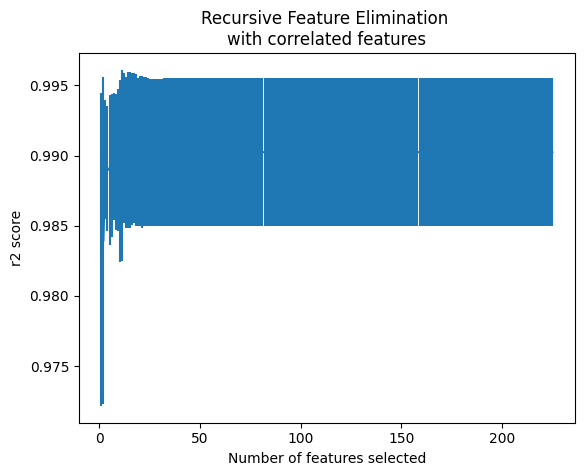

In [ ]:
# Plot the number of features
import matplotlib.pyplot as plt
import pandas as pd

cv_results = pd.DataFrame(selector.cv_results_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("r2 score")
plt.errorbar(
    x=cv_results["n_features"],
    y=cv_results["mean_test_score"],
    yerr=cv_results["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [ ]:
# Choosing the selected features
final_train_output_1 = final_train_output.drop(['SaleFact_Date_', 'SaleFact_Revenue_SUM'], axis = 1)
final_train_output_1 = final_train_output_1.loc[:, selector.support_]
final_train_output.columns

Index(['SaleFact_Date_', 'SaleFact_Year__x', 'SaleFact_Month__x',
       'SaleFact_Is_holiday_', 'SaleFact_Is_business_',
       'SaleFact_Is_spring__x', 'SaleFact_Is_winter__x', 'SaleFact_Is_autumn_',
       'SaleFact_Is_summer_', 'SaleFact_Quarter1__x',
       ...
       'Category_Urban', 'Category_Youth', 'Segment_All Season',
       'Segment_Convenience', 'Segment_Extreme', 'Segment_Moderation',
       'Segment_Productivity', 'Segment_Regular', 'Segment_Select',
       'Segment_Youth'],
      dtype='object', length=227)

In [ ]:
final_train_output_1['Target'] = final_train_output['SaleFact_Revenue_SUM']
final_train_output_1['SaleFact_Date_'] = final_train_output['SaleFact_Date_']

,SaleFact_Date_,SaleFact_Year__x,SaleFact_Month__x,SaleFact_Is_holiday_,SaleFact_Is_business_,SaleFact_Is_spring__x,SaleFact_Is_winter__x,SaleFact_Is_autumn_,SaleFact_Is_summer_,SaleFact_Quarter1__x,...,Category_Urban,Category_Youth,Segment_All Season,Segment_Convenience,Segment_Extreme,Segment_Moderation,Segment_Productivity,Segment_Regular,Segment_Select,Segment_Youth
0,2010-07-04,2010,7,0,0,0,0,0,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2010-07-05,2010,7,1,1,0,0,0,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2010-07-06,2010,7,0,1,0,0,0,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2010-07-07,2010,7,0,1,0,0,0,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010-07-08,2010,7,0,1,0,0,0,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_test_output_1 = final_test_output.drop(['SaleFact_Date_', 'SaleFact_Revenue_SUM'], axis = 1)
final_test_output_1 = final_test_output_1.loc[:, selector.support_]
final_test_output_1.columns

Index(['SaleFact_Year__x', 'SaleFact_Month__x', 'SaleFact_Is_business_',
       'SaleFact_COGS_SUM', 'SaleFact_COGS_MEAN', 'SaleFact_COGS_MAX',
       'SaleFact_Cost_per_unit_SUM', 'SaleFact_Zip_SIZE', 'SaleFact_Units_SUM',
       'SaleFact_Units_MAX', 'Units_Lag_30', 'Units_Rolling_Mean_7',
       'Units_Rolling_Std_7', 'Units_Rolling_Std_30',
       'SaleFact_Year_ SaleFact_Month_', 'District_Encoded', 'Zip_Prefix'],
      dtype='object')

In [ ]:
final_test_output_1['Target'] = final_test_output['SaleFact_Revenue_SUM']
final_test_output_1['SaleFact_Date_'] = final_test_output['SaleFact_Date_']